In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
print (data.head())

   ID  Job tenure  Age  Car price  Funding amount  Down payment  \
0   1          34   55       4875            3087             0   
1   2           5   29      13000           13000             0   
2   3          14   38      17190           14190             0   
3   4          16   37      22773           23568             0   
4   5           1   61       7700            8526             0   

   Loan duration  Monthly payment  Credit event  Married  Homeowner  \
0             36         0.047895             0        1          1   
1             60         0.091667             0        0          0   
2             60         0.088235             0        0          0   
3             48         0.110084             0        1          1   
4             48         0.123404             0        1          0   

   Default (y)  Pred_default (y_hat)        PD  Group  
0            0                     0  0.001356      1  
1            1                     0  0.234995      0  
2 

In [17]:
data = pd.read_csv("Data/black_box_2_data.csv")

# Separate features and target
X = data.drop(columns=["Pred_default (y_hat)"])  
X = X.drop(columns=["PD","Group","Default (y)","ID"])
y = data["PD"]  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train a decision tree regressor as the surrogate model
surrogate_model = DecisionTreeRegressor(max_depth=4)
surrogate_model.fit(X_train, y_train)

# Make predictions with the surrogate model
y_pred_surrogate = surrogate_model.predict(X_test)

# Evaluate the surrogate model
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the surrogate model: {r2}")
print(X.head())

R-squared for the surrogate model: 0.09903119333731181
   Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
0          34   55       4875            3087             0             36   
1           5   29      13000           13000             0             60   
2          14   38      17190           14190             0             60   
3          16   37      22773           23568             0             48   
4           1   61       7700            8526             0             48   

   Monthly payment  Credit event  Married  Homeowner  
0         0.047895             0        1          1  
1         0.091667             0        0          0  
2         0.088235             0        0          0  
3         0.110084             0        1          1  
4         0.123404             0        1          0  


In [18]:
# Make predictions with the surrogate model
y_pred_surrogate = surrogate_model.predict(X_test)

# Define a threshold to convert regression output into binary classification (assuming PD is a binary outcome)
# For example, let's assume a threshold of 0.5
y_pred_classes = (y_pred_surrogate >= 0.5).astype(int)  # Convert predictions to 0 and 1

# Convert the actual target values to binary classes as well (assuming a threshold)
y_test_classes = (y_test >= 0.5).astype(int)

# Calculate accuracy (for binary classification)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate R-squared (for regression)
r2 = r2_score(y_test, y_pred_surrogate)

# Print the results
print(f"R-squared for the surrogate model: {r2}")
print(f"Accuracy for the surrogate model: {accuracy}")

R-squared for the surrogate model: 0.09903119333731181
Accuracy for the surrogate model: 0.8187528039479587


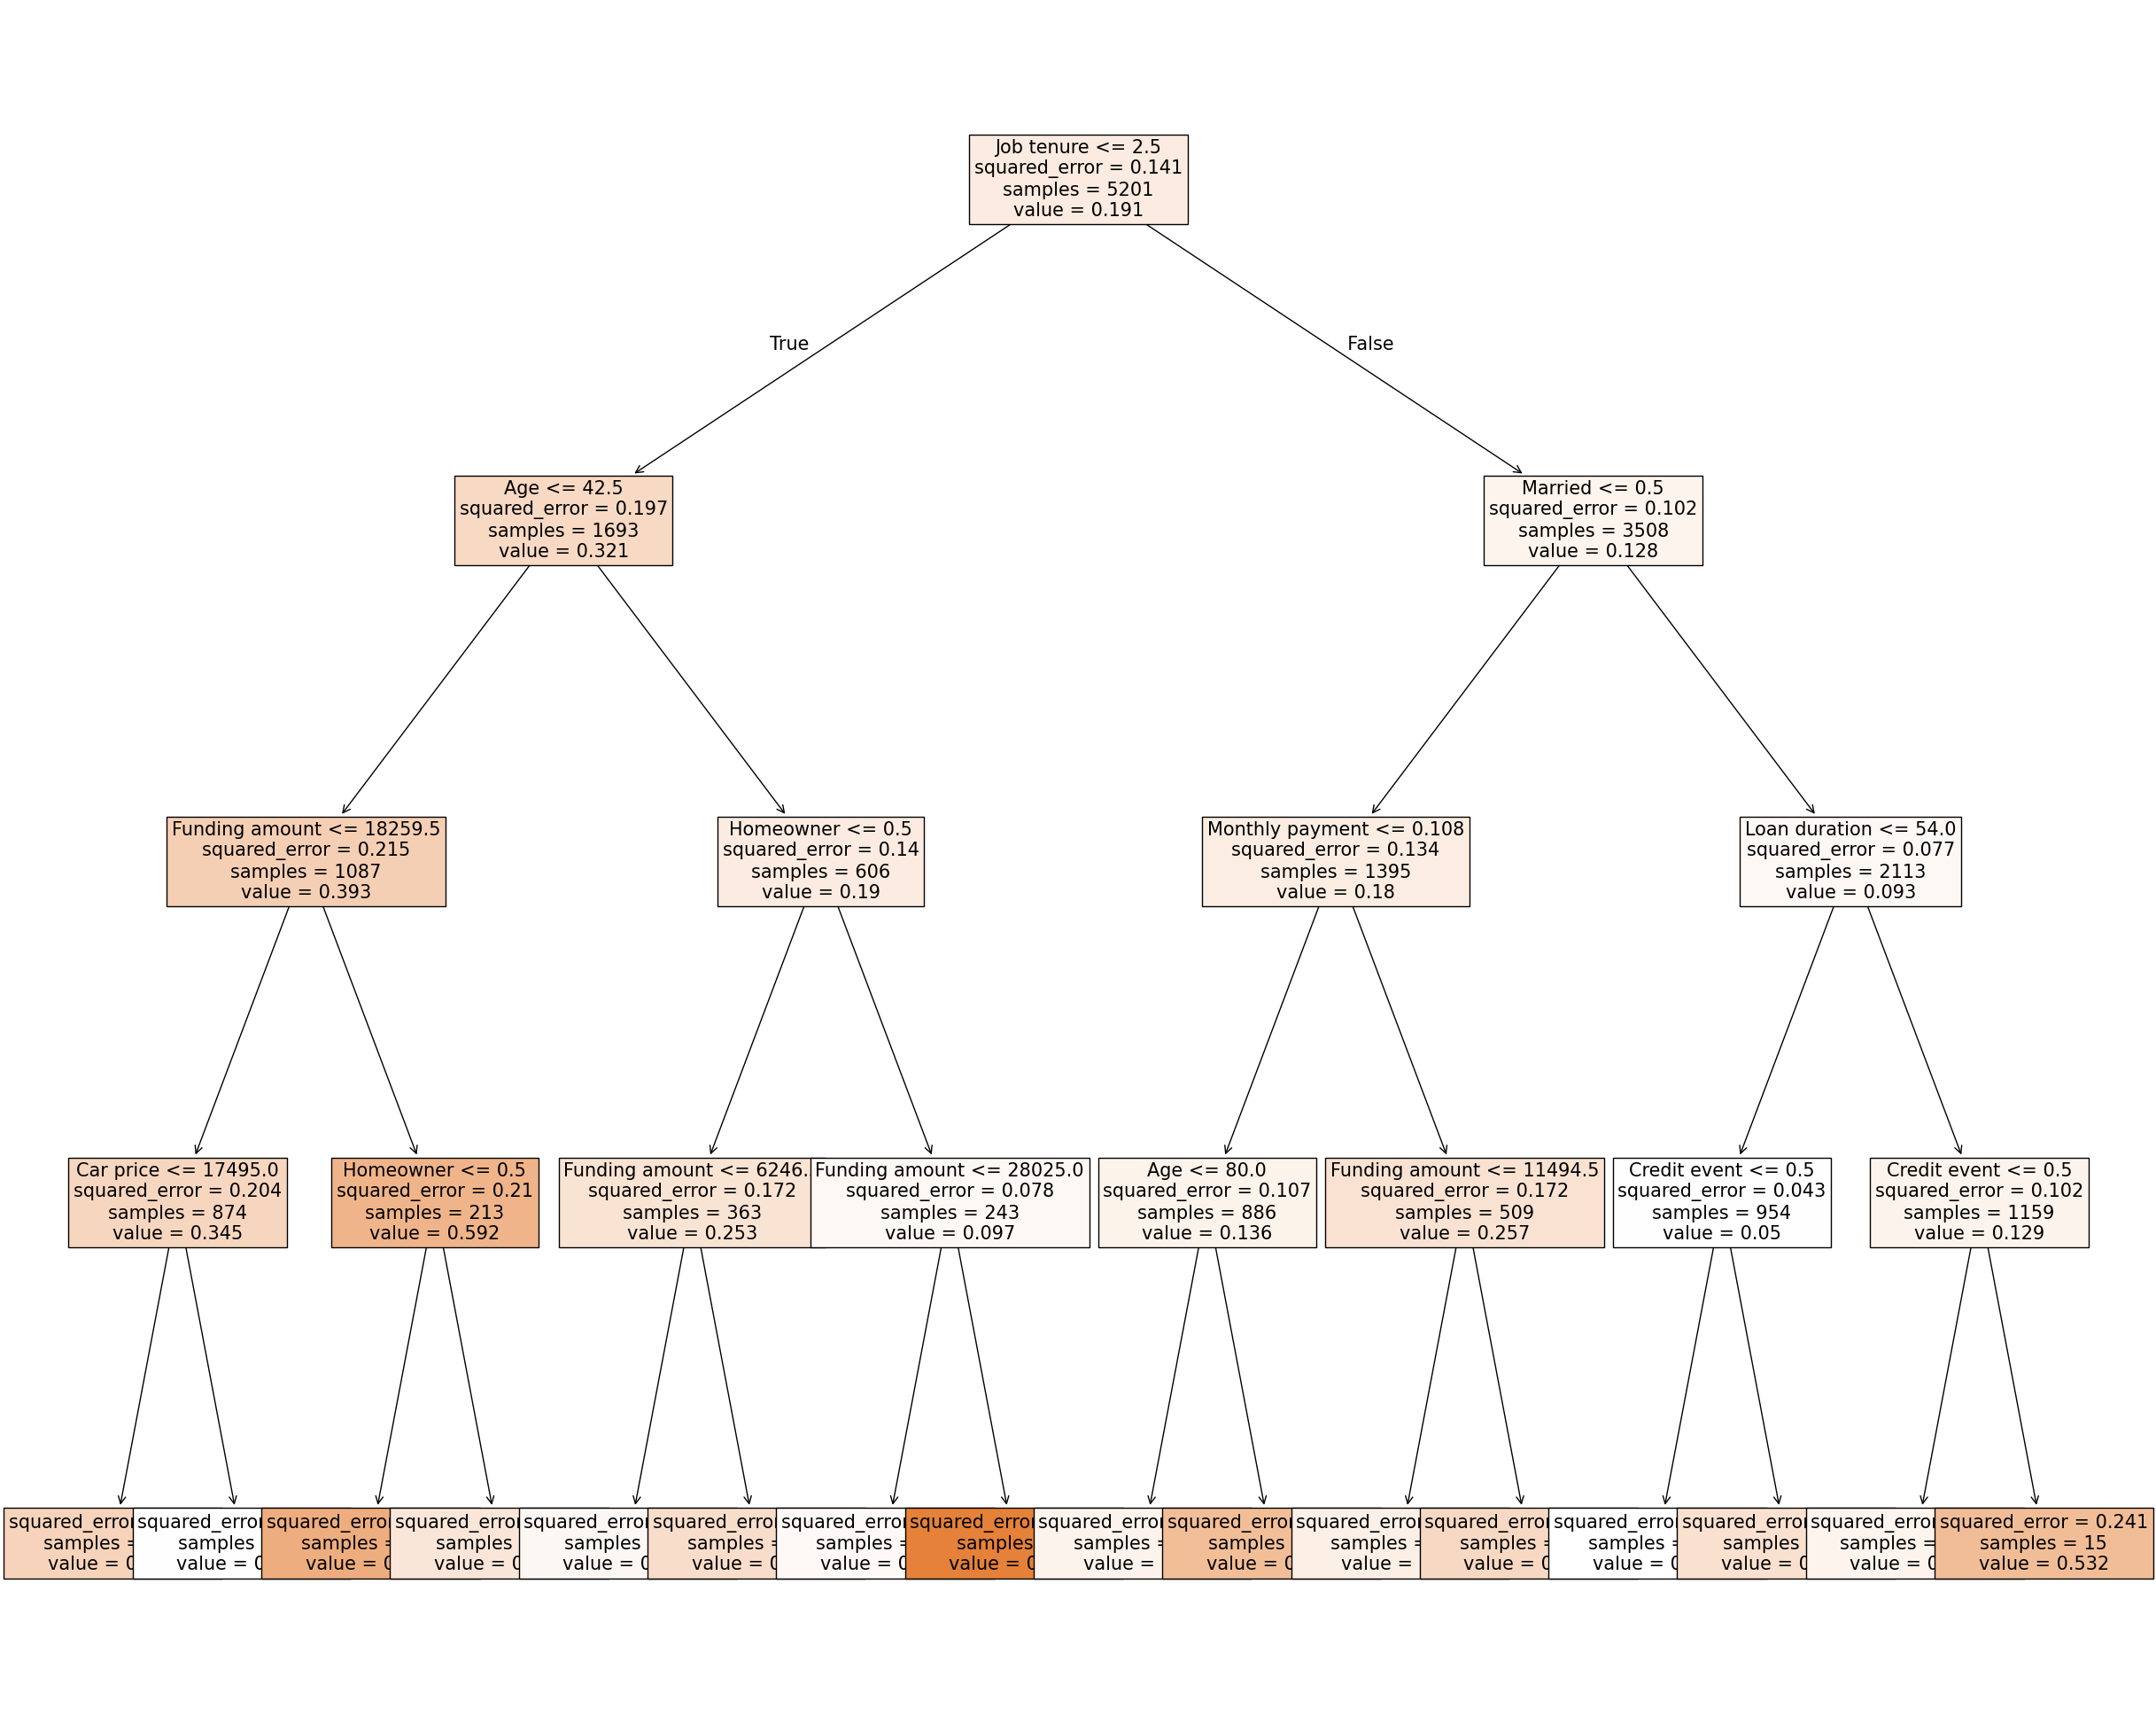

In [19]:
# Plot the decision tree with larger font and bigger nodes
plt.figure(figsize=(30, 25))  # Control the figure size
plot_tree(
    surrogate_model, 
    feature_names=X.columns, 
    filled=True, 
    fontsize=15,  # Increase the font size in the boxes
    proportion=False  # Ensure nodes are not scaled based on proportion
)
plt.show()

In [10]:
# Train a Random Forest surrogate model
surrogate_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
surrogate_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_surrogate = surrogate_model.predict(X_test)
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the Random Forest surrogate model: {r2}")

R-squared for the Random Forest surrogate model: 0.1849807583056189


In [11]:
# Train a Gradient Boosting surrogate model
surrogate_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)
surrogate_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_surrogate = surrogate_model.predict(X_test)
r2 = r2_score(y_test, y_pred_surrogate)
print(f"R-squared for the Gradient Boosting surrogate model: {r2}")

R-squared for the Gradient Boosting surrogate model: 0.20598091402941177


We tried using more complex models like Random Forest and Gradient Boost. Although we lose interpretability, the R² improves by 100% compared to the original simple model. This indicates that the black-box model is very complex, and approximating it through a simple interpretable model proves to be very challenging, hence the R² of 7%.